<a href="https://colab.research.google.com/github/Otobi1/Back-to-Basics-A-Refresher-/blob/master/Back_to_Basics_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
## Neural Networks 

# - Here, we will explore Multi Layer Perceptrons (MLPs), which are a basic type of neural network

# - First, we attempt to motivate non-linear activation functions (fcl) by trying to fit a linear model (logistic regression) on our non-linear spiral data
# - Then we'll implement an MLP using just NumPy and then later on PyTorch
# REF - https://madewithml.com/courses/ml-foundations/neural-networks/ 

# Objective - predict the probability of class y given the inputs X. Non-linearity is introduced to model the complex, non-linear data

In [72]:
# Importing the necessary libraries 

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
SEED = 1234

In [74]:
# Set seed for reproducibility 

np.random.seed(SEED)

random.seed(SEED)

In [75]:
# Loading the data 

url = "https://raw.githubusercontent.com/GokuMohandas/madewithml/main/datasets/spiral.csv"
df = pd.read_csv(url, header = 0) # loading the data
df = df.sample(frac = 1).reset_index(drop = True) # Shuffle the data
df.head()

,X1,X2,color
0,0.106737,0.114197,c1
1,0.311513,-0.664028,c1
2,0.019870,-0.703126,c1
3,-0.054017,0.508159,c3
4,-0.127751,-0.011382,c3


In [76]:
# Exploring the data shapes 

X = df[["X1", "X2"]].values
y = df["color"].values

print (f"X: ", np.shape(X))
print (f"y: ", np.shape(y))

X:  (1500, 2)
y:  (1500,)


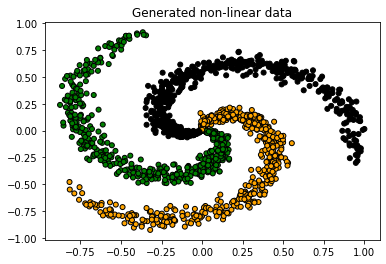

In [77]:
# Visualising the data 

plt.title("Generated non-linear data")
colors = {"c1": "orange", "c2": "green", "c3": "black"} # c1, c2, c3 are the classes within the colors column; this line just gives them some fun colors 
plt.scatter(X[:, 0], X[:, 1], c = [colors[_y] for _y in y], edgecolors = "k", s = 25)
plt.show()

In [78]:
# Splitting the data 

import collections 
from sklearn.model_selection import train_test_split

In [79]:
TRAIN_SIZE = 0.7 
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [80]:
def train_val_test_split(X, y, train_size):
  """Split dataset into data splits."""
  X_train, X_, y_train, y_ = train_test_split(X, y, train_size = TRAIN_SIZE, stratify = y)
  X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size = 0.5, stratify = y_)
  return (X_train, X_val, X_test, y_train, y_val, y_test)

In [81]:
# Creating the data splits using the function above 

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X = X, y = y, train_size = TRAIN_SIZE)

print (f"X_train: {X_train.shape}, y_train: {y_train.shape}") # Ensure you add (.shape) after so as not to print out the actual data (555 in Thai)
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"Sample point: {X_train[0]} -> {y_train[0]}")

X_train: (1050, 2), y_train: (1050,)
X_val: (225, 2), y_val: (225,)
X_test: (225, 2), y_test: (225,)
Sample point: [-0.63919105 -0.69724176] -> c1


In [82]:
# Label Encoding 

# in previous lessons, we wrote the complete label encoder to check under the hood. For this lesson we'll use sklearns LabelEncoder class 

from sklearn.preprocessing import LabelEncoder

In [83]:
# Output vectoriser 

label_encoder = LabelEncoder()

In [84]:
# Fitting it on the train data 

label_encoder = label_encoder.fit(y_train)
classes = list(label_encoder.classes_)
print (f"classes: {classes}")

classes: ['c1', 'c2', 'c3']


In [85]:
# Convert labels to tokens 

print (f"y_train[0]: {y_train[0]}") # Here we are checking the first color (class/label in the training set before applying the label transformer)

y_train = label_encoder.transform(y_train) # Here for each, we are transforming the labels in each of the data splits 
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

print (f"y_train[0]: {y_train[0]}") # Here, we want to check the transformed first color (class/label) in the training set

print (f"y_train[0:5]: {y_train[0:5]}") # Lets see the first 5 entries 

y_train[0]: c1
y_train[0]: 0
y_train[0:5]: [0 0 0 2 1]


In [86]:
# Class weights 

# - Here, we check how equal the different categories are distributed within the datset

counts = np.bincount(y_train) # Replace y_train here with y_val, or y_test to see the class distribution 

class_weights = {i: 1.0/count for i, count in enumerate(counts)}

print (f"counts: {counts}\nweights: {class_weights}")

counts: [350 350 350]
weights: {0: 0.002857142857142857, 1: 0.002857142857142857, 2: 0.002857142857142857}


In [87]:
# Standardising the data 

# Standardising (achieving zero mean and unit variance) such that a specific feature's magnitude doesnt affect how the model learns its weights
# We will only standardise the inputs X because our outputs y are class values

from sklearn.preprocessing import StandardScaler

In [88]:
# Standardise the data (mean = 0, std = 1) using training data

X_scaler = StandardScaler().fit(X_train)

In [89]:
# Apply scaler on training and test (do not standardise outputs for classification projects)

X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

In [90]:
# Check, the mean should be approx 0 and std should be approx 1

print (f"X_test[0]: mean: {np.mean(X_test[:, 0], axis = 0):.1f}, std: {np.std(X_test[:, 0], axis = 0):.1f}")
print (f"X_test[0]: mean: {np.mean(X_test[:, 1], axis = 0):.1f}, std: {np.std(X_test[:, 1], axis = 0):.1f}")

X_test[0]: mean: 0.1, std: 0.9
X_test[0]: mean: 0.0, std: 1.0


In [91]:
# Linear Model 

# - before using the neural networks, we will motivate the non-linear activation functions by implementing a general linear model (logistic regression).
# - We'll see why linear functions won't wokr for our dataset  

In [92]:
import torch 

In [93]:
# Set seed for reproducibility 

torch.manual_seed(SEED)

In [94]:
# Model 
# - We'll create our model using one layer of weights 

from torch import nn
import torch.nn.functional as F

In [95]:
INPUT_DIM = X_train.shape[1] # X is 2 dimensional
HIDDEN_DIM = 100
NUM_CLASSES = len(classes) # there are 3 classes

In [96]:
class LinearModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, num_classes):
    super(LinearModel, self).__init__()
    self.fc1 = nn.Linear(input_dim, hidden_dim)
    self.fc2 = nn.Linear(hidden_dim, num_classes)

  def forward(self, x_in, apply_softmax = False):
    z = self.fc1(x_in) # Linear Activation 
    y_pred = self.fc2(z)
    if apply_softmax:
      y_pred = F.softmax(y_pred, dim = 1)
    return y_pred

In [97]:
# Initialise model

model = LinearModel(input_dim = INPUT_DIM, hidden_dim = HIDDEN_DIM, num_classes = NUM_CLASSES)
print (model.named_parameters)

<bound method Module.named_parameters of LinearModel(
  (fc1): Linear(in_features=2, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=3, bias=True)
)>


In [98]:
# Training the initialised model 

from torch.optim import Adam

In [99]:
LEARNING_RATE = 1e-2
NUM_EPOCHS = 10
BATCH_SIZE = 32

In [100]:
# Defining the loss 

class_weights_tensor = torch.Tensor(list(class_weights.values()))
loss_fn = nn.CrossEntropyLoss(weight = class_weights_tensor)

In [101]:
# Accuracy

def accuracy_fn(y_pred, y_true):
  n_correct = torch.eq(y_pred, y_true).sum().item()
  accuracy = (n_correct / len(y_pred)) * 100
  return accuracy

In [102]:
# Optimiser

optimiser = Adam(model.parameters(), lr = LEARNING_RATE)

In [103]:
# Convert data to tensors

X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)

X_val = torch.tensor(X_val)
y_val = torch.LongTensor(y_val)

X_test = torch.tensor(X_test)
y_test = torch.LongTensor(y_test)

In [104]:
# Training the model 

for epoch in range (NUM_EPOCHS):

  # Forward pass 
  y_pred = model(X_train)

  # Loss
  loss = loss_fn(y_pred, y_train)

  # Zero all gradients 
  optimiser.zero_grad()

  # Backward pass 
  loss.backward()

  # Update weights 
  optimiser.step()

  if epoch%1 == 0:
    predictions = y_pred.max(dim = 1) [1] #class
    accuracy = accuracy_fn(y_pred = predictions, y_true = y_train)
    print (f"Epoch: {epoch} | loss: {loss:.2f}, accuracy: {accuracy:.1f}")

Epoch: 0 | loss: 1.13, accuracy: 49.9
Epoch: 1 | loss: 0.91, accuracy: 50.3
Epoch: 2 | loss: 0.79, accuracy: 55.3
Epoch: 3 | loss: 0.74, accuracy: 54.6
Epoch: 4 | loss: 0.74, accuracy: 53.7
Epoch: 5 | loss: 0.75, accuracy: 53.6
Epoch: 6 | loss: 0.76, accuracy: 53.7
Epoch: 7 | loss: 0.77, accuracy: 53.8
Epoch: 8 | loss: 0.77, accuracy: 53.9
Epoch: 9 | loss: 0.78, accuracy: 53.9


In [105]:
# Evaluation 

import json
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

In [106]:
def get_performance(y_true, y_pred, classes):
  """Per-class performance metrics."""
  # Get metrics
  performance = {"overall": {}, "class": {}}
  metrics = precision_recall_fscore_support(y_true, y_pred)

  #Overall performance 
  performance["overall"]["precision"] = np.mean(metrics[0])
  performance["overall"]["recall"] = np.mean(metrics[1])
  performance["overall"]["f1"] = np.mean(metrics[2])
  performance["overall"]["num_samples"] = np.float64(np.sum(metrics[3]))

  # Per-class performance 
  for i in range(len(classes)):
    performance["class"][classes[i]] = {
        "precision": metrics[0][i],
        "recall": metrics[1][i],
        "f1":metrics[2][i],
        "num_samples": np.float64(metrics[3][i])
    }

  return performance

In [107]:
# Predictions 

y_prob = model(X_test.float(), apply_softmax = True) # Add a .float after X_test to prevent the RunTime error. If you remove it now, you'll knwo what i mean 
print (f"sample probability: {y_prob[0]}")

y_pred = y_prob.max(dim = 1) [1]
print (f"sample class: {y_pred[0]}")

sample probability: tensor([0.8995, 0.0286, 0.0719], grad_fn=<SelectBackward>)
sample class: 0


In [108]:
# Performance report 

performance = get_performance(y_true = y_test, y_pred = y_pred, classes = classes)
print (json.dumps(performance, indent = 2))

{
  "overall": {
    "precision": 0.5326832791621524,
    "recall": 0.5333333333333333,
    "f1": 0.5327986224880954,
    "num_samples": 225.0
  },
  "class": {
    "c1": {
      "precision": 0.5,
      "recall": 0.5066666666666667,
      "f1": 0.5033112582781457,
      "num_samples": 75.0
    },
    "c2": {
      "precision": 0.5211267605633803,
      "recall": 0.49333333333333335,
      "f1": 0.5068493150684932,
      "num_samples": 75.0
    },
    "c3": {
      "precision": 0.5769230769230769,
      "recall": 0.6,
      "f1": 0.5882352941176471,
      "num_samples": 75.0
    }
  }
}


In [109]:
# Now, lets plot the data again to see how well our linearly activated model performed 

def plot_multiclass_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
  cmap = plt.cm.Spectral

  X_test = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
  y_pred = model(X_test, apply_softmax = True)

  _, y_pred = y_pred.max(dim  = 1)
  y_pred = y_pred.reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap = plt.cm.Spectral, alpha = 0.8)
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu_r)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


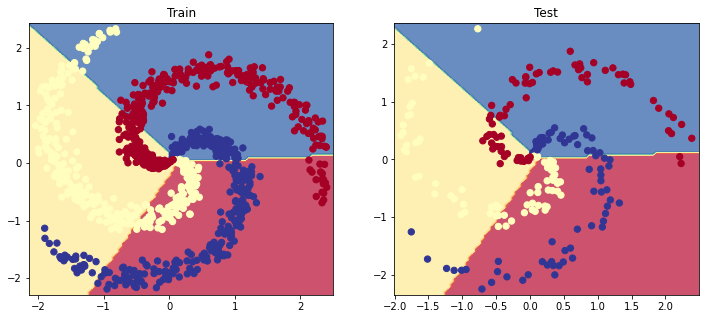

In [110]:
# Lets visualise the decision boundary 

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_multiclass_decision_boundary(model = model, X = X_train, y = y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_multiclass_decision_boundary(model = model, X = X_test, y = y_test)
plt.show()

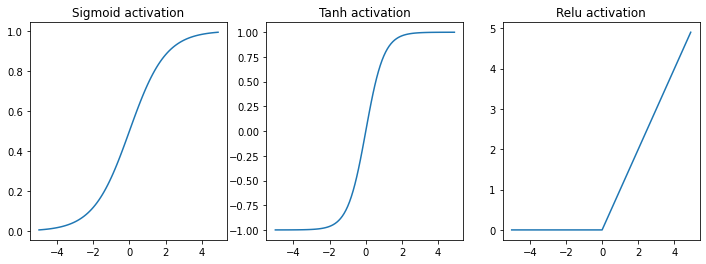

In [111]:
# Inference and the implication of the activation function used 

# - USing the general linear method for logistic regression yeilded poor results because of the non-linearity in the data (just to show this, we used a linear activation function)

## - to achieve better results, we need to use other activation functions that allows our model to learn and map the non-linearity in the data

# Here are a few options See https://madewithml.com/courses/ml-foundations/neural-networks/ for more details

# Figure size 

plt.figure(figsize = (12, 4))

# Data
x = torch.arange(-5., 5., 0.1)

# Simoid activation function, (constrain a value between 0 and 1.)
plt.subplot(1, 3, 1)
plt.title("Sigmoid activation")
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())

# Tanh activation function, (constrain a value between -1 and 1.)
plt.subplot(1, 3, 2)
plt.title("Tanh activation")
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())

# Relu (clip the negative value to 0)
plt.subplot(1, 3, 3)
plt.title("Relu activation")
y = F.relu(x)
plt.plot(x.numpy(), y.numpy())

# Show plots
plt.show()

In [112]:
## NumPy Implementation 

# - Here we will create the MLP with activations to map the non-linearity in the dat set
# - You'll notice that nn's are just extensions of the linear methods we've seen but with non-linear activation function since the data is highly non-linear 

In [113]:
# - Step 1 - Randomly initialise the models weights for the first layer 

W1 = 0.01 * np.random.randn(INPUT_DIM, HIDDEN_DIM)
b1 = np.zeros((1, HIDDEN_DIM))

print (f"W1: {W1.shape}")
print (f"b1: {b1.shape}")

W1: (2, 100)
b1: (1, 100)


In [114]:
# - Step 2 - Feed the inputs X into the model to do the forwards pass and receive the probabilities 

# z1 = [NX2] * [2X100] +[1X100] = [NX100]

z1 = np.dot(X_train, W1) + b1
print (f"z1: {z1.shape}")

z1: (1050, 100)


In [115]:
# Apply the activation function 

a1 = np.maximum(0, z1) # ReLU
print (f"a1: {a1.shape}")

a1: (1050, 100)


In [116]:
# We pass the activation into the second layer to get the logits 
# - Initialise the second layer of weights 

W2 = 0.01 * np.random.randn(HIDDEN_DIM, NUM_CLASSES)
b2 = np.zeros((1, NUM_CLASSES))

print (f"W2: {W2.shape}")
print (f"b2: {b2.shape}")

W2: (100, 3)
b2: (1, 3)


In [117]:
# z2 = logits = [NX100] * [100X3] + [1X3] = [NX3]

logits = np.dot(a1, W2) + b2

print (f"logits: {logits.shape}")
print (f"sample: {logits[0]}")

logits: (1050, 3)
sample: [-0.00010001  0.00418463 -0.00067274]


In [118]:
# We apply the softmax fucntion to normalise the logits and obtain class probabilities 

exp_logits = np.exp(logits)
y_hat = exp_logits / np.sum(exp_logits, axis = 1, keepdims = True)

print (f"y_hat: {y_hat.shape}")
print (f"sample: {y_hat[0]}")

y_hat: (1050, 3)
sample: [0.33292037 0.33434987 0.33272975]


In [119]:
# - Step 3 - Loss 
# - compare the predictiosn with the actual target values y with the objective (cost) function to determine loss.
# - A common objective (cost function) for classification is Cross Entropy Loss

correct_class_logprobs = -np.log(y_hat[range(len(y_hat)), y_train])
loss = np.sum(correct_class_logprobs) / len(y_train)

print (f"loss: {loss:.2f}")

loss: 1.10


In [120]:
# Step 4 - Gradients 
# Calculate the gradient of loss w.r.t the models weights

# the gradient of the loss w.r.t W2 is the same as teh gradients from logistic regression since y_hat = softmax(z2)

In [121]:
# dJ/dW2
dscores = y_hat
dscores[range(len(y_hat)), y_train] -= 1
dscores /= len(y_train)
dW2 = np.dot(a1.T, dscores)
db2 = np.sum(dscores, axis = 0, keepdims = True)

In [122]:
# dJ/dW1

dhidden = np.dot(dscores, W2.T)
dhidden[a1 <= 0] = 0 # ReLu backpropagation 
dW1 = np.dot(X_train.T, dhidden)
db1 = np.sum(dhidden, axis = 0, keepdims = True)

In [123]:
# - Step 5 - Update weights

W1 += - LEARNING_RATE * dW1
b1 += - LEARNING_RATE * db1
W2 += - LEARNING_RATE * dW2
b2 += - LEARNING_RATE * db2

In [124]:
# - Step 6 - Training (Repeat Step 2 - Step 5 until the model performs well)

# Convert tensors to NumPy arrays
X_train = X_train.numpy()
y_train = y_train.numpy()

X_val = X_val.numpy()
y_val = y_val.numpy()

X_test = X_test.numpy()
y_test = y_test.numpy()


In [129]:
# Initialise the random weights 

W1 = 0.01 * np.random.randn(INPUT_DIM, HIDDEN_DIM)
b1 = np.zeros((1, HIDDEN_DIM))
W2 = 0.01 * np.random.randn(HIDDEN_DIM, NUM_CLASSES)
b2 = np.zeros((1, NUM_CLASSES))

# Training loop
for epoch_num in range (1000):

  # First layer forward pass [NX2] * [2X100] +[1X100] = [NX100]
  z1 = np.dot(X_train, W1) + b1

  # Apply activation function 
  a1 = np.maximum(0, z1) # ReLu

  # z2 = logits = [NX100] * [100X3] + [1X3] = [NX3]
  logits = np.dot(a1, W2) + b2

  # Normalisation through softmax obtain class probabilities 
  exp_logits = np.exp(logits)
  y_hat = exp_logits / np.sum(exp_logits, axis = 1, keepdims = True)

  # Show progress 
  if epoch_num%50 == 0:
    # Accuracy
    y_pred = np.argmax(logits, axis = 1)
    accuracy = np.mean(np.equal(y_train, y_pred))
    print (f"Epoch: {epoch_num}, loss: {loss:.3f}, accuracy: {accuracy:.3f}")

  # dJ/dW2
  dscores = y_hat 
  dscores[range(len(y_hat)), y_train] -= 1
  dscores /= len(y_train)
  dW2 = np.dot(a1.T, dscores)
  db2 = np.sum(dscores, axis = 0, keepdims = True)

  #dJ/dW1
  dhidden = np.dot(dscores, W2.T)
  dhidden[a1 <= 0] = 0 # ReLu backpropagation 
  dW1 = np.dot(X_train.T, dhidden)
  db1 = np.sum(dhidden, axis = 0, keepdims = True)

  # Update weights 
  W1 += - 1e0 * dW1
  b1 += - 1e0 * db1
  W2 += - 1e0 * dW2
  b2 += - 1e0 * db2



Epoch: 0, loss: 1.099, accuracy: 0.273
Epoch: 50, loss: 1.099, accuracy: 0.583
Epoch: 100, loss: 1.099, accuracy: 0.690
Epoch: 150, loss: 1.099, accuracy: 0.818
Epoch: 200, loss: 1.099, accuracy: 0.893
Epoch: 250, loss: 1.099, accuracy: 0.918
Epoch: 300, loss: 1.099, accuracy: 0.949
Epoch: 350, loss: 1.099, accuracy: 0.958
Epoch: 400, loss: 1.099, accuracy: 0.968
Epoch: 450, loss: 1.099, accuracy: 0.976
Epoch: 500, loss: 1.099, accuracy: 0.985
Epoch: 550, loss: 1.099, accuracy: 0.987
Epoch: 600, loss: 1.099, accuracy: 0.988
Epoch: 650, loss: 1.099, accuracy: 0.990
Epoch: 700, loss: 1.099, accuracy: 0.990
Epoch: 750, loss: 1.099, accuracy: 0.992
Epoch: 800, loss: 1.099, accuracy: 0.993
Epoch: 850, loss: 1.099, accuracy: 0.993
Epoch: 900, loss: 1.099, accuracy: 0.993
Epoch: 950, loss: 1.099, accuracy: 0.994


In [130]:
# Evaluation - Checking how the model performs on the test data split

class MLPFromScratch():
  def predict(self, x):
    z1 = np.dot(x, W1) + b1
    a1 = np.maximum(0, z1)
    logits = np.dot(a1, W2) + b2
    exp_logits = np.exp(logits)
    y_hat = exp_logits / np.sum(exp_logits, axis = 1, keepdims = True)
    return y_hat


In [131]:
# Evaluation 

model = MLPFromScratch()
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis = 1)

In [132]:
# Performance report

performance = get_performance(y_true = y_test, y_pred = y_pred, classes = classes)
print (json.dumps(performance, indent =2))

{
  "overall": {
    "precision": 0.9956140350877193,
    "recall": 0.9955555555555556,
    "f1": 0.9955553580159119,
    "num_samples": 225.0
  },
  "class": {
    "c1": {
      "precision": 1.0,
      "recall": 0.9866666666666667,
      "f1": 0.9932885906040269,
      "num_samples": 75.0
    },
    "c2": {
      "precision": 1.0,
      "recall": 1.0,
      "f1": 1.0,
      "num_samples": 75.0
    },
    "c3": {
      "precision": 0.9868421052631579,
      "recall": 1.0,
      "f1": 0.9933774834437086,
      "num_samples": 75.0
    }
  }
}


In [133]:
# lets visualise the model  performance on the dataset 

def plot_multiclass_decision_boundary_numpy(model, X, y, savefig_fp = None):
  """Plot the multiclass decision boundary for a model that accepts 2D inputs
   Credit: https://cs231n.github.io/neural-networks-case-study/

    Arguments:
        model {function} -- trained model with function model.predict(x_in).
        X {numpy.ndarray} -- 2D inputs with shape (N, 2).
        y {numpy.ndarray} -- 1D outputs with shape (N,).
  """
  # Axis boundaries 

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                       np.linspace(y_min, y_max, 101))
  
  # Create predictions 
  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)
  y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)

  # Plot decision boundary 
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.Spectral, alpha = 0.8)
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlGn_r)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  # Plot
  if savefig_fp:
    plt.savefig(savefig_fp, format = "png")

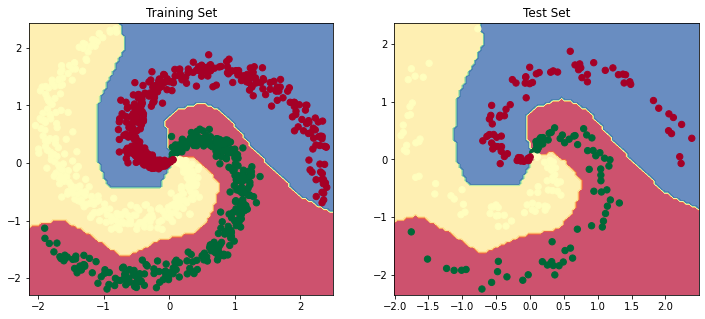

In [134]:
# Visualising the decision boundary 

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.title("Training Set")
plot_multiclass_decision_boundary_numpy(model = model, X = X_train, y = y_train)
plt.subplot(1, 2, 2)
plt.title("Test Set")
plot_multiclass_decision_boundary_numpy(model = model, X = X_test, y = y_test)
plt.show()
